## 1° Problema de Negócio

#### Classificação - Problemas cardíacos

### Variáveis:

* idade: Idade do indivíduo. (Inteiro)

* gênero: Gênero do indivíduo. (Inteiro -> masculino(1)/feminino(2))

* altura: Altura do indivíduo em centímetros. (Inteiro)

* peso: Peso do indivíduo em quilogramas. (Inteiro)

* ap_hi: Leitura da pressão arterial sistólica. (Inteiro)

* ap_lo: Leitura da pressão arterial diastólica. (Inteiro)

* colesterol: Nível de colesterol do indivíduo. (Inteiro)

* gluc: Nível de glicose do indivíduo. (Inteiro)

* fumante: Status de fumante do indivíduo. (Boleano)

* álcool: Estado de consumo de álcool do indivíduo. (Boleano)

* ativo: Nível de atividade física do indivíduo. (Boleano)

* cardio: Presença ou ausência de doença cardiovascular. (Boleano)

fonte:https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas 

In [5]:
import pandas as pd
import numpy as nd
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split,cross_val_score, GridSearchCV)
from sklearn import metrics
from sklearn.metrics import (cohen_kappa_score, confusion_matrix, accuracy_score,
precision_score, recall_score, f1_score,roc_auc_score, roc_curve, auc, r2_score,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('base/dados.csv')

### 2° AED e Correção

In [7]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df.shape

(69976, 12)

In [9]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [10]:
df.columns = ['idade','genero','altura','peso','p_sistolica','p_diastolica',
             'colesterol','glicose','fumante','bebida_alcool','ativo','cardio']

In [11]:
df.head()

,idade,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69976 entries, 0 to 69975
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idade          69976 non-null  int64  
 1   genero         69976 non-null  int64  
 2   altura         69976 non-null  int64  
 3   peso           69976 non-null  float64
 4   p_sistolica    69976 non-null  int64  
 5   p_diastolica   69976 non-null  int64  
 6   colesterol     69976 non-null  int64  
 7   glicose        69976 non-null  int64  
 8   fumante        69976 non-null  int64  
 9   bebida_alcool  69976 non-null  int64  
 10  ativo          69976 non-null  int64  
 11  cardio         69976 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [13]:
df.isnull().sum()

idade            0
genero           0
altura           0
peso             0
p_sistolica      0
p_diastolica     0
colesterol       0
glicose          0
fumante          0
bebida_alcool    0
ativo            0
cardio           0
dtype: int64

In [14]:
#Skewnees -  Assimetria
#g1 = 0, a distribuição é simétrica;
#g1 > 0, a distribuição é assimétrica positiva (à direita);
#g1 < 0, a distribuição é assimétrica negativa (à esquerda).
#1) Verifique o sinal: se (-) assimetria à esquerda e se (+) assimetria à direita; 
#2) Se o seu valor estiver próximo de zero, isto é, dentro do intervalo [ -1 ,+ 1], os 
#dados serão mais simétricos, caso contrário, terão alto grau de assimetria.
df.skew()

idade            -0.307076
genero            0.630605
altura           -0.642142
peso              1.011633
p_sistolica      85.281695
p_diastolica     32.108622
colesterol        1.586588
glicose           2.396858
fumante           2.905204
bebida_alcool     3.955803
ativo            -1.529392
cardio            0.000915
dtype: float64

In [15]:
#Kurtosis - Curtose
##Curtose vai dizer o grau de achatamento da distruição normal
#Quando a curtose é igual a 3, eu tenho uma distribuição normal dos dados
#Todas estão abaixo da normal. Se tiver uma apenas, mesmo nesse caso temos que fazer a  
#normalização
df.kurt()

idade              -0.823501
genero             -1.602383
altura              7.941495
peso                2.585593
p_sistolica      7577.487566
p_diastolica     1425.428849
colesterol          0.992126
glicose             4.291350
fumante             6.440396
bebida_alcool      13.648769
ativo               0.339048
cardio             -2.000056
dtype: float64

In [55]:
#AED com dataprep
from dataprep.eda import create_report
create_report(df).show_browser()

  0%|                                           | 0/1611 [00:00<?, ?it/s]

### Após análise de datapred vou tirar a prova de algunas valores

In [16]:
#A idade está em dias
df['idade'].describe()

count    69976.000000
mean     19468.950126
std       2467.374620
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: idade, dtype: float64

In [17]:
#Verificar os outliers da idade
df['idade'].describe()/365

count    191.715068
mean      53.339589
std        6.759930
min       29.583562
25%       48.394521
50%       53.980822
75%       58.430137
max       64.967123
Name: idade, dtype: float64

In [18]:
#p_sistolica tem valores negativos
df[df['p_sistolica'] < 0]

,idade,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,cardio
4607,15281,1,165,78.0,-100,80,2,1,0,0,1,0
16020,22108,2,161,90.0,-115,70,1,1,0,0,1,0
20535,15581,1,153,54.0,-100,70,1,1,0,0,1,0
23986,18301,1,162,74.0,-140,90,1,1,0,0,1,1
25238,14711,2,168,50.0,-120,80,2,1,0,0,0,1
35038,23325,2,168,59.0,-150,80,1,1,0,0,1,1
46618,23646,2,160,59.0,-120,80,1,1,0,0,0,0


In [19]:
#Vamos remover os valores negativos
df_remove = df.loc[df['p_sistolica'] < 0]
df = df.drop(df_remove.index)

In [20]:
df[df['p_sistolica'] < 0]

,idade,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,cardio


In [21]:
df.shape

(69969, 12)

In [22]:
df['p_sistolica'].describe()

count    69969.000000
mean       128.845417
std        154.025113
min          1.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: p_sistolica, dtype: float64

In [23]:
#Pressão p_diastolica tem 0 e negativo
df[df['p_diastolica'] < 0]

,idade,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,cardio
60090,22571,1,167,74.0,15,-70,1,1,0,0,1,1


In [24]:
#Vamos remover os valores negativos
df_remove_di = df.loc[df['p_diastolica'] < 0]
df = df.drop(df_remove_di.index)

In [25]:
df[df['p_diastolica'] < 0]

,idade,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,cardio


In [26]:
#Vamos remover os valores zerados
df[df['p_diastolica'] == 0]

,idade,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,cardio
2014,22712,2,167,59.0,906,0,1,1,0,0,1,0
13488,14965,2,150,60.0,130,0,1,1,0,0,0,0
16458,20457,1,156,50.0,138,0,3,1,0,0,1,1
17380,18226,1,164,78.0,138,0,1,1,0,0,1,0
22921,21182,2,166,68.0,149,0,1,1,0,0,1,1
23865,16131,1,161,92.0,906,0,2,1,0,0,1,1
25452,17952,2,176,73.0,12,0,1,1,0,0,1,0
27684,23396,2,180,73.0,140,0,1,1,1,1,1,1
31781,16070,1,170,64.0,907,0,1,1,0,0,1,0
38368,23208,2,170,81.0,148,0,1,1,0,0,1,0


In [27]:
df_remove_di = df.loc[df['p_diastolica'] == 0]
df = df.drop(df_remove_di.index)

In [28]:
df[df['p_diastolica']==0]

,idade,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,cardio


In [29]:
df['p_diastolica'].describe()

count    69947.000000
mean        96.669464
std        188.535065
min          1.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: p_diastolica, dtype: float64

In [30]:
#Verificando os dados duplicados
df[df.duplicated(keep=False)]

,idade,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,cardio


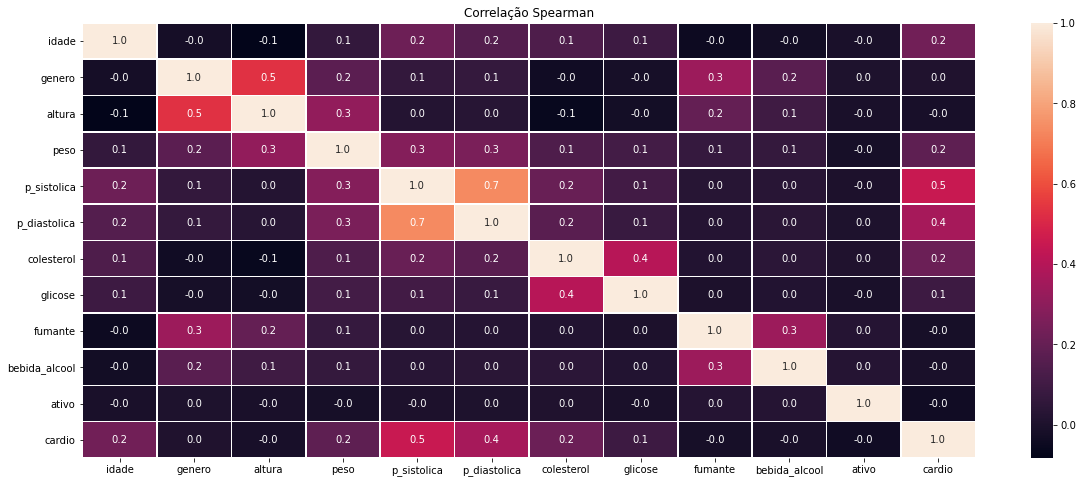

In [31]:
# Correlação Spearman para regressão 
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.heatmap(df.corr(method='spearman'), annot = True, fmt=".1f", linewidths=.6)
ax.set_title('Correlação Spearman')
plt.show()

In [32]:
#Vamos fazer o dummy. Eu vou fazer apenas do gênero, pois pelo sexo não pode influenciar muito
df = pd.get_dummies(df, columns=['genero'])
df.head()

,idade,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,cardio,genero_1,genero_2
0,18393,168,62.0,110,80,1,1,0,0,1,0,0,1
1,20228,156,85.0,140,90,3,1,0,0,1,1,1,0
2,18857,165,64.0,130,70,3,1,0,0,0,1,1,0
3,17623,169,82.0,150,100,1,1,0,0,1,1,0,1
4,17474,156,56.0,100,60,1,1,0,0,0,0,1,0


In [33]:
from sklearn.utils import resample
mask = df.cardio == 1
surv_df = df[mask]
death_df = df[~mask]
df_downsample = resample(death_df,replace=False,n_samples=len(surv_df),random_state=42,)
df = pd.concat([surv_df, df_downsample])

In [34]:
df.cardio.value_counts()

1    34962
0    34962
Name: cardio, dtype: int64

In [35]:
#Separando a variáveis preditores do alvo
X = df.drop(['cardio'], axis=1)
y = df['cardio']

In [36]:
X

,idade,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,genero_1,genero_2
1,20228,156,85.0,140,90,3,1,0,0,1,1,0
2,18857,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,169,82.0,150,100,1,1,0,0,1,0,1
7,22584,178,95.0,130,90,3,3,0,0,1,0,1
15,16782,172,112.0,120,80,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7830,21871,165,66.0,120,80,1,1,0,0,1,1,0
7165,19100,174,72.0,130,80,1,1,0,0,1,1,0
22577,22423,151,49.0,130,70,1,2,0,0,1,1,0
63053,19038,156,69.0,140,90,1,1,0,0,1,1,0


In [37]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 7) 

In [38]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (48946, 12)
Shape dos dados de teste é (20978, 12)


In [39]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 
#minmax = MinMaxScaler()
#X_train = minmax.fit_transform(X_train)
#X_test = minmax.transform(X_test) 


print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[-1.00989532  0.07491286  0.05472226  0.00444292 -0.09203072 -0.53844045
  -0.39578738  3.20631866 -0.23829359 -2.01912339 -1.36253167  1.36253167]
 [-2.00878078  0.07491286  1.7895688  -0.05228562 -0.03388674 -0.53844045
  -0.39578738 -0.31188416 -0.23829359  0.49526443  0.73392789 -0.73392789]
 [-0.89202197  0.07491286  1.37320563  0.17462853  0.01897142 -0.53844045
  -0.39578738 -0.31188416 -0.23829359  0.49526443  0.73392789 -0.73392789]
 [-2.02457824  0.93172926 -0.77800408 -0.05228562 -0.0867449   0.93248137
   1.35166069 -0.31188416 -0.23829359  0.49526443 -1.36253167  1.36253167]
 [ 1.57238157  0.93172926  1.51199335  0.06117146 -0.03388674 -0.53844045
   3.09910876 -0.31188416 -0.23829359  0.49526443 -1.36253167  1.36253167]]
-------------------------

X_test :
 [[ 0.40985064 -0.65950121 -0.98618566 -0.10901415 -0.13960306 -0.53844045
  -0.39578738 -0.31188416 -0.23

### 3° Construindo as Máquinas Preditivas

### Naive Bayes

In [112]:
#Importar
from sklearn.naive_bayes import GaussianNB

In [113]:
#Vamos instanciar
nb = GaussianNB()

In [114]:
#Treinar
nb.fit(X_train, y_train)

GaussianNB()

In [115]:
nb.score(X_test, y_test)

0.5889026599294499

In [116]:
y_pred = nb.predict(X_test)

In [117]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
nb_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(nb_curva_roc,2)}')

Acurácia:0.59
Precisão:0.72
Recall ou Sensibilidade:0.29
F1-Score:0.42
Kappa:0.18
Curva ROC:0.59


### Regressão Logística

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
#Vamos instanciar
lr = LogisticRegression(random_state=7,max_iter=1000)

In [120]:
#Treinar
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=7)

In [121]:
lr.score(X_test, y_test)

0.71946801411002

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [122]:
cv_scores = cross_val_score(lr,X,y, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.70168037 0.69474437 0.70160887 0.71104755 0.71238558]
Média dos Scores = 0.704293348381602


In [73]:
#Obter a previsões
lr_previsoes = lr.predict(X_test)
lr_previsoes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
lr_previsoes_prob = lr.predict_proba(X_test)
lr_previsoes_prob

array([[0.77783004, 0.22216996],
       [0.48275761, 0.51724239],
       [0.44460945, 0.55539055],
       ...,
       [0.57791278, 0.42208722],
       [0.54405729, 0.45594271],
       [0.47037238, 0.52962762]])

### Matriz de Confusão

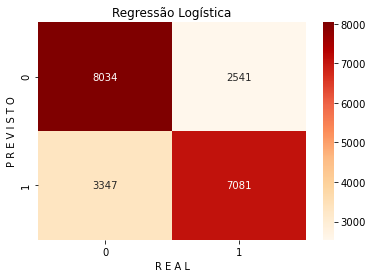

In [74]:
sns.heatmap(confusion_matrix(y_test, lr_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [42]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,lr_previsoes)
precisao = precision_score(y_test,lr_previsoes)
recall = recall_score(y_test,lr_previsoes)
f1Score = f1_score(y_test,lr_previsoes)
lr_curva_roc = roc_auc_score(y_test,lr_previsoes)
kappa = cohen_kappa_score(y_test,lr_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(lr_curva_roc,2)}')

Acurácia:0.73
Precisão:0.74
Recall ou Sensibilidade:0.69
F1-Score:0.71
Kappa:0.45
Curva ROC:0.73


In [43]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10607
           1       0.74      0.69      0.71     10378

    accuracy                           0.73     20985
   macro avg       0.73      0.73      0.73     20985
weighted avg       0.73      0.73      0.73     20985



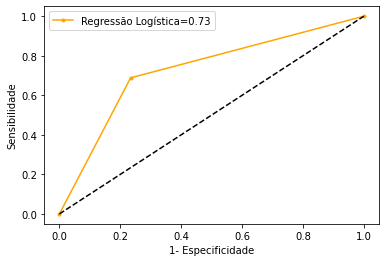

In [44]:
rl_fp,rl_vp,lim1 = roc_curve(y_test,lr_previsoes)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística='+str(round(lr_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()

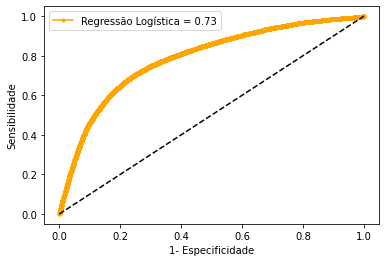

In [45]:
#Aqui estamos pegando apenas da classe 1
lr_probs = lr_previsoes_prob[:,1]
rl_fp,rl_vp,lim1 = roc_curve(y_test,lr_probs)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística = '+str(round(lr_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### GridSearch Regressão Logística

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [47]:
parameters = {'C': [-3,3,7], 'penalty': ['l1', 'l2']}

In [48]:
logreg = LogisticRegression()

In [56]:
# Criar o objeto GridSearchCV
grid_search = GridSearchCV(logreg, parameters, cv = 5)

In [57]:
# Ajustar o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [-3, 3, 7], 'penalty': ['l1', 'l2']})

In [58]:
# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados: ", grid_search.best_params_)

Melhores parâmetros encontrados:  {'C': 7, 'penalty': 'l2'}


In [59]:
# Avaliar o desempenho do modelo com os parâmetros otimizados
accuracy = grid_search.score(X_test, y_test)
print("Acurácia do modelo otimizado: ", accuracy)

Acurácia do modelo otimizado:  0.7278055754110079


In [60]:
lg_best  = grid_search.best_estimator_

In [61]:
y_pred = lg_best.predict(X_test)

In [62]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
knc_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(knc_curva_roc,2)}')

Acurácia:0.73
Precisão:0.74
Recall ou Sensibilidade:0.69
F1-Score:0.71
Kappa:0.46
Curva ROC:0.73


In [63]:
print(classification_report(y_test, lg_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10607
           1       0.74      0.69      0.71     10378

    accuracy                           0.73     20985
   macro avg       0.73      0.73      0.73     20985
weighted avg       0.73      0.73      0.73     20985



### Máquina Vetor Suporte

In [123]:
from sklearn.svm import SVC

In [65]:
svc = SVC(random_state=7, probability=True)

In [66]:
svc.fit(X_train, y_train)

SVC(probability=True, random_state=7)

In [68]:
svc.score(X_test, y_test)

0.730474148201096

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [69]:
cv_scores = cross_val_score(svc,X,y, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.60600429 0.6042173  0.60576167 0.60154407 0.60218743]
Média dos Scores = 0.6039429520110537


In [70]:
#Obter a previsões
svc_previsoes = svc.predict(X_test)
svc_previsoes

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [71]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
svc_previsoes_prob = svc.predict_proba(X_test)
svc_previsoes_prob

array([[0.76853469, 0.23146531],
       [0.61538539, 0.38461461],
       [0.39242379, 0.60757621],
       ...,
       [0.47964112, 0.52035888],
       [0.60177267, 0.39822733],
       [0.47017284, 0.52982716]])

### Matriz de Confusão

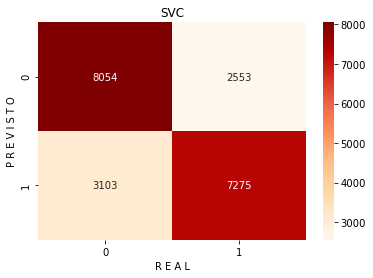

In [72]:
sns.heatmap(confusion_matrix(y_test, svc_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [73]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,svc_previsoes)
precisao = precision_score(y_test,svc_previsoes)
recall = recall_score(y_test,svc_previsoes)
f1Score = f1_score(y_test,svc_previsoes)
svc_curva_roc = roc_auc_score(y_test,svc_previsoes)
kappa = cohen_kappa_score(y_test,svc_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(svc_curva_roc,2)}')

Acurácia:0.73
Precisão:0.74
Recall ou Sensibilidade:0.7
F1-Score:0.72
Kappa:0.46
Curva ROC:0.73


In [74]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10607
           1       0.74      0.70      0.72     10378

    accuracy                           0.73     20985
   macro avg       0.73      0.73      0.73     20985
weighted avg       0.73      0.73      0.73     20985



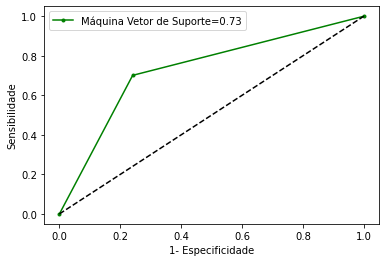

In [75]:
svc_fp,svc_vp,lim2 = roc_curve(y_test,svc_previsoes)
plt.plot(svc_fp,svc_vp, marker='.', label='Máquina Vetor de Suporte='+str(round(svc_curva_roc,2)),color="green")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()

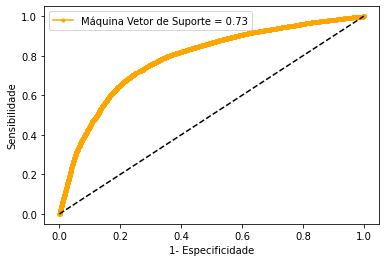

In [76]:
#Aqui estamos pegando apenas da classe 1
svc_probs = svc_previsoes_prob[:,1]
svc_fp,svc_vp,lim2 = roc_curve(y_test,svc_probs)
plt.plot(svc_fp,svc_vp, marker='.', label='Máquina Vetor de Suporte = '+str(round(svc_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### GridSearch  Máquina Vetor Suporte

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [78]:
# Definir os hiperparâmetros que você deseja ajustar
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10]}

In [79]:
# Inicializar o classificador SVC
svc = SVC()

In [80]:
# Criar o objeto GridSearchCV
svc_grid_search = GridSearchCV(svc, parameters,cv=5)

In [81]:
# Ajustar o modelo aos dados de treinamento
svc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [82]:
# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados: ", svc_grid_search.best_params_)

Melhores parâmetros encontrados:  {'C': 10, 'kernel': 'rbf'}


In [83]:
# Avaliar o desempenho do modelo com os parâmetros otimizados
accuracy = svc_grid_search.score(X_test, y_test)
print("Acurácia do modelo otimizado: ", accuracy)

Acurácia do modelo otimizado:  0.7322373123659757


In [84]:
svc_best  = svc_grid_search.best_estimator_

In [85]:
y_pred = svc_best.predict(X_test)

In [86]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
svc_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(svc_curva_roc,2)}')

Acurácia:0.73
Precisão:0.74
Recall ou Sensibilidade:0.71
F1-Score:0.72
Kappa:0.46
Curva ROC:0.73


In [87]:
print(classification_report(y_test, svc_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74     10607
           1       0.74      0.71      0.72     10378

    accuracy                           0.73     20985
   macro avg       0.73      0.73      0.73     20985
weighted avg       0.73      0.73      0.73     20985



### KNN

In [124]:
#Vamos importar
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#Vamos instanciar
knn = KNeighborsClassifier()

In [36]:
#Treinar
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
knn.score(X_test, y_test)

0.6522754348344055

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [38]:
cv_scores = cross_val_score(knn,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.68191565 0.67119371 0.68434596 0.68548964 0.68305933 0.68591851
 0.67848463 0.68916214 0.68430083 0.68444381]
Média dos Scores = 0.6828314211118975


In [39]:
#Obter a previsões
knn_previsoes = knn.predict(X_test)
knn_previsoes

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [40]:
# Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
knn_previsoes_prob = knn.predict_proba(X_test)
knn_previsoes_prob

array([[0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       ...,
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6]])

### Matriz de Confusão

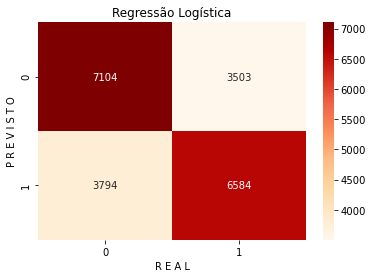

In [41]:
sns.heatmap(confusion_matrix(y_test, knn_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [42]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,knn_previsoes)
precisao = precision_score(y_test,knn_previsoes)
recall = recall_score(y_test,knn_previsoes)
f1Score = f1_score(y_test,knn_previsoes)
knn_curva_roc = roc_auc_score(y_test,knn_previsoes)
kappa = cohen_kappa_score(y_test,knn_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(knn_curva_roc,2)}')

Acurácia:0.65
Precisão:0.65
Recall ou Sensibilidade:0.63
F1-Score:0.64
Kappa:0.3
Curva ROC:0.65


In [43]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66     10607
           1       0.65      0.63      0.64     10378

    accuracy                           0.65     20985
   macro avg       0.65      0.65      0.65     20985
weighted avg       0.65      0.65      0.65     20985



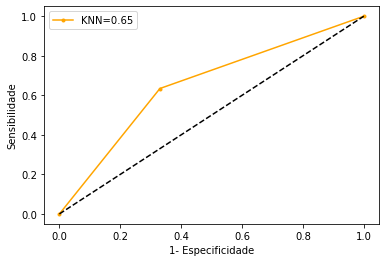

In [44]:
knn_fp,knn_vp,lim3 = roc_curve(y_test,knn_previsoes)
plt.plot(knn_fp,knn_vp, marker='.', label='KNN='+str(round(knn_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

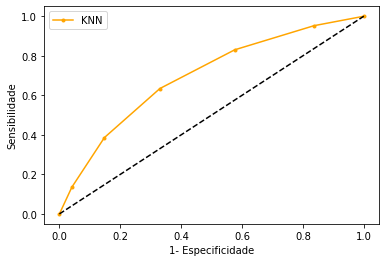

In [45]:
#Aqui estamos pegando apenas da classe 1
knn_probs = knn_previsoes_prob[:,1]
knn_fp,knn_vp,lim1 = roc_curve(y_test,knn_probs)
plt.plot(knn_fp,knn_vp, marker='.', label='KNN',color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome ds eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Grid Search KNN

In [50]:
# Inicializar o classificador KNN
knn = KNeighborsClassifier()

In [51]:
parameters = {'n_neighbors': [3, 6, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [52]:
grid_search = GridSearchCV(knn, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 6, 9],
                         'weights': ['uniform', 'distance']})

In [53]:
# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados: ", grid_search.best_params_)

Melhores parâmetros encontrados:  {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


In [54]:
# Avaliar o desempenho do modelo com os parâmetros otimizados
accuracy = grid_search.score(X_test, y_test)
print("Acurácia do modelo otimizado: ", accuracy)

Acurácia do modelo otimizado:  0.6632832975935192


In [55]:
knn_best = grid_search.best_estimator_

In [56]:
#y_pred = grid_search.predict(X_test)
y_pred = knn_best.predict(X_test)

In [57]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
knc_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(knc_curva_roc,2)}')

Acurácia:0.66
Precisão:0.66
Recall ou Sensibilidade:0.64
F1-Score:0.65
Kappa:0.33
Curva ROC:0.66


In [58]:
print(classification_report(y_test, knn_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67     10607
           1       0.66      0.64      0.65     10378

    accuracy                           0.66     20985
   macro avg       0.66      0.66      0.66     20985
weighted avg       0.66      0.66      0.66     20985



### Decision Tree - Árvore de decisão

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dt = DecisionTreeClassifier(random_state=7, max_depth=7)

In [103]:
#Treinar
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=7)

In [104]:
dt.score(X_test, y_test)

0.7325708839647367

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [105]:
cv_scores = cross_val_score(dt,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.72780558 0.72566119 0.7336669  0.74195854 0.72966405 0.73495354
 0.72623302 0.7352016  0.72805262 0.7274807 ]
Média dos Scores = 0.7310677731939335


In [106]:
#Obter a previsões
dt_previsoes = dt.predict(X_test)
dt_previsoes

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
dt_previsoes_prob = dt.predict_proba(X_test)
dt_previsoes_prob

array([[0.8879668 , 0.1120332 ],
       [0.30952381, 0.69047619],
       [0.50653753, 0.49346247],
       ...,
       [0.50653753, 0.49346247],
       [0.66006826, 0.33993174],
       [0.55      , 0.45      ]])

### Matriz de Confusão

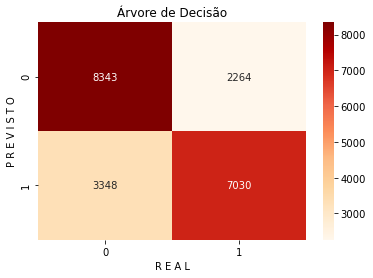

In [108]:
sns.heatmap(confusion_matrix(y_test, dt_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Árvore de Decisão')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [109]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,dt_previsoes)
precisao = precision_score(y_test,dt_previsoes)
recall = recall_score(y_test,dt_previsoes)
f1Score = f1_score(y_test,dt_previsoes)
dt_curva_roc = roc_auc_score(y_test,dt_previsoes)
kappa = cohen_kappa_score(y_test,dt_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(dt_curva_roc,2)}')

Acurácia:0.73
Precisão:0.76
Recall ou Sensibilidade:0.68
F1-Score:0.71
Kappa:0.46
Curva ROC:0.73


In [110]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10607
           1       0.76      0.68      0.71     10378

    accuracy                           0.73     20985
   macro avg       0.74      0.73      0.73     20985
weighted avg       0.73      0.73      0.73     20985



### Curva ROC

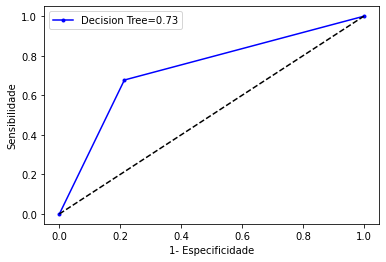

In [111]:
dt_fp,dt_vp,lim2 = roc_curve(y_test,dt_previsoes)
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree='+str(round(dt_curva_roc,2)),color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

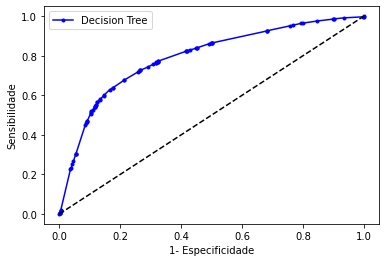

In [112]:
#Aqui estamos pegando apenas da classe 1
dt_probs = dt_previsoes_prob[:,1]
dt_fp,dt_vp,lim2 = roc_curve(y_test,dt_probs)
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree',color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Grid Search Decision Tree

In [113]:
# Definir os parâmetros para busca em grade
parameters = {'max_depth': [3, 6, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [114]:
grid_search = GridSearchCV(dt, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=7, random_state=7),
             param_grid={'max_depth': [3, 6, 9], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [115]:
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [116]:
dt_best = grid_search.best_estimator_

In [117]:
y_pred = dt_best.predict(X_test)

In [118]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
dt_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(dt_curva_roc,2)}')

Acurácia:0.73
Precisão:0.76
Recall ou Sensibilidade:0.67
F1-Score:0.71
Kappa:0.47
Curva ROC:0.73


### Floresta aleatória - RandomForest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rf = RandomForestClassifier(random_state=7, max_depth=7,n_estimators = 10)

In [121]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=10, random_state=7)

In [122]:
rf.score(X_test, y_test)

0.7342863950440791

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [123]:
cv_scores = cross_val_score(rf,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.73166548 0.73066476 0.73781272 0.73252323 0.72952109 0.73938528
 0.72780558 0.73434372 0.7267658  0.7274807 ]
Média dos Scores = 0.7317968347422472


In [124]:
#Obter a previsões
rf_previsoes = rf.predict(X_test)
rf_previsoes

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [125]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
rf_previsoes_prob = rf.predict_proba(X_test)
rf_previsoes_prob

array([[0.81431604, 0.18568396],
       [0.52569845, 0.47430155],
       [0.4052161 , 0.5947839 ],
       ...,
       [0.52233741, 0.47766259],
       [0.66225929, 0.33774071],
       [0.53926951, 0.46073049]])

### Matriz de Confusão

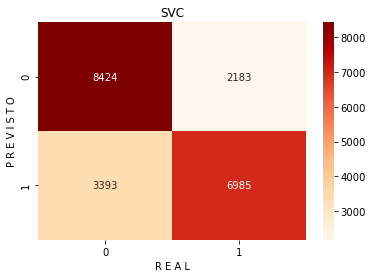

In [126]:
sns.heatmap(confusion_matrix(y_test, rf_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [127]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,rf_previsoes)
precisao = precision_score(y_test,rf_previsoes)
recall = recall_score(y_test,rf_previsoes)
f1Score = f1_score(y_test,rf_previsoes)
rf_curva_roc = roc_auc_score(y_test,rf_previsoes)
kappa = cohen_kappa_score(y_test,rf_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rf_curva_roc,2)}')

Acurácia:0.73
Precisão:0.76
Recall ou Sensibilidade:0.67
F1-Score:0.71
Kappa:0.47
Curva ROC:0.73


In [128]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10607
           1       0.76      0.67      0.71     10378

    accuracy                           0.73     20985
   macro avg       0.74      0.73      0.73     20985
weighted avg       0.74      0.73      0.73     20985



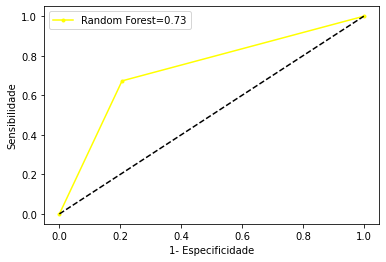

In [129]:
rf_fp,rf_vp,lim3 = roc_curve(y_test,rf_previsoes)
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest='+str(round(rf_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

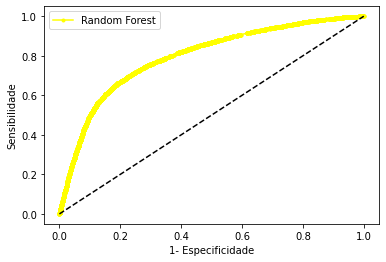

In [130]:
rf_probs = rf_previsoes_prob[:,1]
rf_fp,rf_vp,lim3 = roc_curve(y_test,rf_probs)
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest',color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Grid Search Random Forest

In [131]:
parameters = {'n_estimators': [50, 100, 500],
              'max_depth': [3, 6, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [132]:
grid_search = GridSearchCV(rf, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=7, n_estimators=10,
                                              random_state=7),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 500]})

In [133]:
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [134]:
rf_best = grid_search.best_estimator_

In [135]:
y_pred = rf_best.predict(X_test)

In [136]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
rf_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rf_curva_roc,2)}')

Acurácia:0.74
Precisão:0.76
Recall ou Sensibilidade:0.69
F1-Score:0.72
Kappa:0.48
Curva ROC:0.74


### Gradient Boosting

In [127]:
from sklearn.ensemble import  GradientBoostingClassifier

In [138]:
grb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,random_state=7)

In [139]:
grb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=7)

In [140]:
grb.score(X_test, y_test) 

0.740052418394091

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [141]:
cv_scores = cross_val_score(grb,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.73423874 0.7312366  0.74353109 0.74167262 0.73295211 0.73952823
 0.73238027 0.74192165 0.73148413 0.7344867 ]
Média dos Scores = 0.7363432150461654


In [142]:
#Obter a previsões
grb_previsoes = grb.predict(X_test)
grb_previsoes

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [143]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
grb_previsoes_prob = grb.predict_proba(X_test)
grb_previsoes_prob

array([[0.90846413, 0.09153587],
       [0.53070332, 0.46929668],
       [0.38013496, 0.61986504],
       ...,
       [0.47964023, 0.52035977],
       [0.60949285, 0.39050715],
       [0.55760155, 0.44239845]])

### Matriz de Confusão

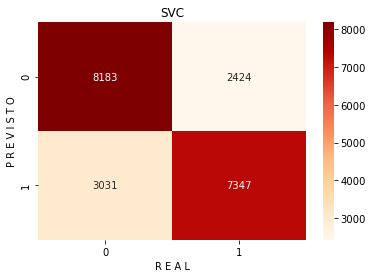

In [144]:
sns.heatmap(confusion_matrix(y_test, grb_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [145]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,grb_previsoes)
precisao = precision_score(y_test,grb_previsoes)
recall = recall_score(y_test,grb_previsoes)
f1Score = f1_score(y_test,grb_previsoes)
grb_curva_roc = roc_auc_score(y_test,grb_previsoes)
kappa = cohen_kappa_score(y_test,grb_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rf_curva_roc,2)}')

Acurácia:0.74
Precisão:0.75
Recall ou Sensibilidade:0.71
F1-Score:0.73
Kappa:0.48
Curva ROC:0.74


In [146]:
print(classification_report(y_test, grb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75     10607
           1       0.75      0.71      0.73     10378

    accuracy                           0.74     20985
   macro avg       0.74      0.74      0.74     20985
weighted avg       0.74      0.74      0.74     20985



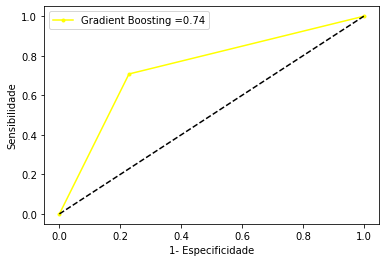

In [147]:
grb_fp,grb_vp,lim3 = roc_curve(y_test,grb_previsoes)
plt.plot(grb_fp,grb_vp, marker='.', label='Gradient Boosting ='+str(round(grb_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

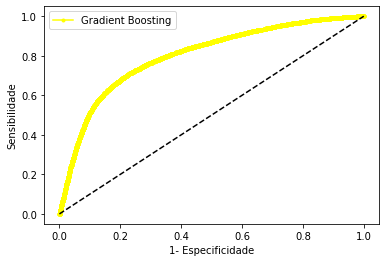

In [148]:
grb_probs = grb_previsoes_prob[:,1]
grb_fp,grb_vp,lim3 = roc_curve(y_test,grb_probs)
plt.plot(grb_fp,grb_vp, marker='.', label='Gradient Boosting',color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Gradient Boosting Grid Search

In [149]:
parameters = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 6, 9]}

In [150]:
# Realizar a busca em grade
grid_search = GridSearchCV(grb, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=7),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 150]})

In [151]:
# Obter os melhores hiperparâmetros
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}


In [152]:
grb_best = grid_search.best_estimator_

In [153]:
y_pred = grb_best.predict(X_test)

In [154]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
grb_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rf_curva_roc,2)}')

Acurácia:0.74
Precisão:0.75
Recall ou Sensibilidade:0.71
F1-Score:0.73
Kappa:0.48
Curva ROC:0.74


### XGBoost

In [128]:
#Importando
import xgboost as xgb

In [129]:
xgb = xgb.XGBClassifier(random_state=7) 

In [130]:
#eval_set=[(X_test, y_test)] aqui eu já valido com o teste,
#mas o ideal e fazer sem o X_test. Depois testamos, mas para experimento eu fiz
xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.62406
[1]	validation_0-logloss:0.58773
[2]	validation_0-logloss:0.56790
[3]	validation_0-logloss:0.55661
[4]	validation_0-logloss:0.55058
[5]	validation_0-logloss:0.54700
[6]	validation_0-logloss:0.54498
[7]	validation_0-logloss:0.54371
[8]	validation_0-logloss:0.54294
[9]	validation_0-logloss:0.54270
[10]	validation_0-logloss:0.54268
[11]	validation_0-logloss:0.54252
[12]	validation_0-logloss:0.54263
[13]	validation_0-logloss:0.54277
[14]	validation_0-logloss:0.54281
[15]	validation_0-logloss:0.54283
[16]	validation_0-logloss:0.54268
[17]	validation_0-logloss:0.54271
[18]	validation_0-logloss:0.54263
[19]	validation_0-logloss:0.54261
[20]	validation_0-logloss:0.54263


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, ...)

In [158]:
xgb.score(X_test, y_test) 

0.7387657850845842

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [159]:
cv_scores = cross_val_score(xgb,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.73766976 0.72952109 0.74181558 0.74052895 0.72809149 0.73781272
 0.73481058 0.73863311 0.73205605 0.73134115]
Média dos Scores = 0.7352280490394809


In [160]:
#Obter a previsões
xgb_previsoes = xgb.predict(X_test)
xgb_previsoes

array([0, 0, 1, ..., 0, 0, 0])

In [161]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
xgb_previsoes_prob = xgb.predict_proba(X_test)
xgb_previsoes_prob

array([[0.9020735 , 0.09792653],
       [0.51131   , 0.48869   ],
       [0.48996246, 0.51003754],
       ...,
       [0.50411034, 0.49588963],
       [0.5867158 , 0.4132842 ],
       [0.53601956, 0.4639804 ]], dtype=float32)

### Matriz de Confusão

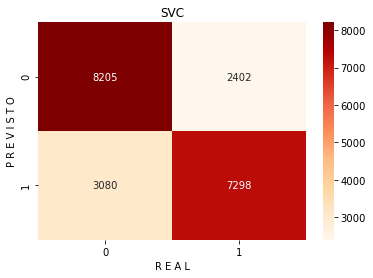

In [162]:
sns.heatmap(confusion_matrix(y_test, xgb_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [163]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,xgb_previsoes)
precisao = precision_score(y_test,xgb_previsoes)
recall = recall_score(y_test,xgb_previsoes)
f1Score = f1_score(y_test,xgb_previsoes)
xgb_curva_roc = roc_auc_score(y_test,xgb_previsoes)
kappa = cohen_kappa_score(y_test,xgb_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rf_curva_roc,2)}')

Acurácia:0.74
Precisão:0.75
Recall ou Sensibilidade:0.7
F1-Score:0.73
Kappa:0.48
Curva ROC:0.74


In [164]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75     10607
           1       0.75      0.70      0.73     10378

    accuracy                           0.74     20985
   macro avg       0.74      0.74      0.74     20985
weighted avg       0.74      0.74      0.74     20985



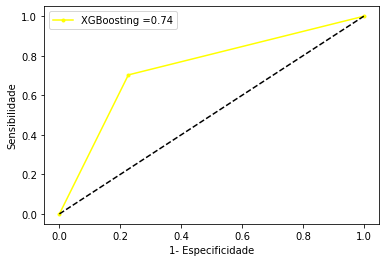

In [165]:
xgb_fp,xgb_vp,lim3 = roc_curve(y_test,xgb_previsoes)
plt.plot(xgb_fp,xgb_vp, marker='.', label='XGBoosting ='+str(round(xgb_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

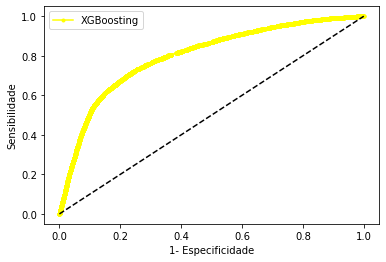

In [166]:
xgb_probs = xgb_previsoes_prob[:,1]
xgb_fp,xgb_vp,lim3 = roc_curve(y_test,xgb_probs)
plt.plot(xgb_fp,xgb_vp, marker='.', label='XGBoosting',color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Seleção de características e Aprendizado de Máquina

Nesta seção, selecionaremos recursos com métodos diferentes que são seleção de recursos com correlação, eliminação de recurso recursivo (RFE) e eliminação de recurso recursivo com validação cruzada (RFECV). Usaremos a classificação Random Forest para treinar nosso modelo.

### 1 - Recursive feature elimination (RFE) with Random Forest

RFE usa um dos métodos de classificação (floresta aleatória) que atribui pesos a cada recurso. Os menores pesos são removidos do conjunto atual de recursos. Esse procedimento é repetido recursivamente no conjunto podado até que o número desejado de recursos seja alcançado.

In [33]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  recall_score

In [34]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
# Se eu não colocar o columns=X.columns eu não vou conseguir selecionar as melhores features
data_normalizado = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [35]:
data_normalizado.columns

Index(['idade', 'altura', 'peso', 'p_sistolica', 'p_diastolica', 'colesterol',
       'glicose', 'fumante', 'bebida_alcool', 'ativo', 'genero_1', 'genero_2'],
      dtype='object')

In [36]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(data_normalizado ,y, test_size=0.3, random_state = 7) 

In [43]:
# Create the RFE object and rank each pixel
clf_rf_2 = RandomForestClassifier(random_state=7)      
rfe = RFE(estimator=clf_rf_2, n_features_to_select=12, step=1)
rfe = rfe.fit(X_train, y_train)

In [44]:
print('Atributos abordagem rfe:',X.columns[rfe.support_])

Atributos abordagem rfe: Index(['idade', 'altura', 'peso', 'p_sistolica', 'p_diastolica', 'colesterol',
       'glicose', 'ativo', 'genero_2'],
      dtype='object')


Recall is:  0.7097706687222972
Accuracy is:  0.7153204670002382
F1 score is:  0.711484593837535


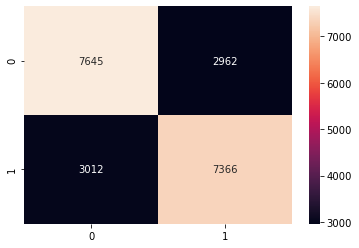

In [45]:
recall = recall_score(y_test,rfe.predict(X_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,rfe.predict(X_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,rfe.predict(X_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,rfe.predict(X_test))
ax = sns.heatmap(cm,annot=True,fmt="d")

### 2 - Recursive feature elimination with cross validation and Random Forest classification

In [85]:
from sklearn.feature_selection import RFECV

clf_rf_3 = RandomForestClassifier(random_state=7) 
#rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5, scoring='recall')   #5-fold cross-validation
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 1


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [84]:
recall = recall_score(y_test,rfecv.predict(X_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,rfecv.predict(X_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,rfecv.predict(X_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,rfecv.predict(X_test))
ax = sns.heatmap(cm,annot=True,fmt="d")

ValueError: X has 2 features, but RFECV is expecting 12 features as input.

###  Utilizando abordagem Filtro

In [81]:
# Import the necessary libraries first
import numpy
import pandas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Parâmetro K é número de TOP features

In [82]:
#selector = SelectKBest(score_func=chi2, k=3)
selector = SelectKBest(score_func=mutual_info_classif, k=9)
#selector = SelectKBest(score_func=f_classif, k=42)

In [83]:
#selector.fit(data_normal, y)
selector.fit(X_train, y_train)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
print(cols)

ValueError: k should be >=0, <= n_features = 2; got 9. Use k='all' to return all features.

In [76]:
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

AttributeError: 'SelectKBest' object has no attribute 'scores_'

In [72]:
from sklearn.ensemble import  GradientBoostingClassifier

Recall is:  0.6277702832915784
Accuracy is:  0.7157493447700739
F1 score is:  0.685969992103185


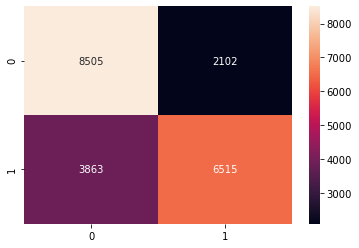

In [73]:
#random forest classifier with n_estimators=10 (default)
grb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1,random_state=7)
grb = grb.fit(X_train,y_train)
#clf_rf = RandomForestClassifier(random_state=42)      
#clr_rf = clf_rf.fit(X_train,y_train)
recall = recall_score(y_test,grb.predict(X_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,grb.predict(X_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,grb.predict(X_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,grb.predict(X_test))
ax = sns.heatmap(cm,annot=True,fmt="d")

### Utilizando abordagem Filtro por correlação de spearman

In [63]:
df.corr(method='spearman')['cardio']

idade            0.234456
altura          -0.012539
peso             0.182575
p_sistolica      0.452261
p_diastolica     0.362618
colesterol       0.215095
glicose          0.091376
fumante         -0.015579
bebida_alcool   -0.007462
ativo           -0.035616
cardio           1.000000
genero_1        -0.008066
genero_2         0.008066
Name: cardio, dtype: float64

In [75]:
X = df[['idade','peso','p_sistolica','p_diastolica','colesterol']]
y = df['cardio']

In [76]:
X

,idade,peso,p_sistolica,p_diastolica,colesterol
0,18393,62.0,110,80,1
1,20228,85.0,140,90,3
2,18857,64.0,130,70,3
3,17623,82.0,150,100,1
4,17474,56.0,100,60,1
...,...,...,...,...,...
69971,19240,76.0,120,80,1
69972,22601,126.0,140,90,2
69973,19066,105.0,180,90,3
69974,22431,72.0,135,80,1


In [77]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69971    0
69972    1
69973    1
69974    1
69975    0
Name: cardio, Length: 69947, dtype: int64

In [86]:
#Importando
import xgboost as xgb

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 7) 

In [88]:
xgb = xgb.XGBClassifier(random_state=7) 

In [89]:
xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.62396
[1]	validation_0-logloss:0.58769
[2]	validation_0-logloss:0.56753
[3]	validation_0-logloss:0.55621
[4]	validation_0-logloss:0.55024
[5]	validation_0-logloss:0.54636
[6]	validation_0-logloss:0.54445
[7]	validation_0-logloss:0.54328
[8]	validation_0-logloss:0.54255
[9]	validation_0-logloss:0.54221
[10]	validation_0-logloss:0.54185
[11]	validation_0-logloss:0.54166
[12]	validation_0-logloss:0.54149
[13]	validation_0-logloss:0.54146
[14]	validation_0-logloss:0.54161
[15]	validation_0-logloss:0.54151
[16]	validation_0-logloss:0.54154
[17]	validation_0-logloss:0.54156
[18]	validation_0-logloss:0.54159
[19]	validation_0-logloss:0.54159
[20]	validation_0-logloss:0.54153
[21]	validation_0-logloss:0.54159
[22]	validation_0-logloss:0.54146


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, ...)

In [90]:
xgb.score(X_test, y_test) 
#Obs: Testei com os dados normalizados, mas não houve melhora

0.7387657850845842

### Feature Importance with XGBoost

In [123]:
#Importando
import xgboost as xgb
from xgboost import plot_importance

In [97]:
xgb = xgb.XGBClassifier(random_state=7) 

In [98]:
#eval_set=[(X_test, y_test)] aqui eu já valido com o teste,
#mas o ideal e fazer sem o X_test. Depois testamos, mas para experimento eu fiz
xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.62396
[1]	validation_0-logloss:0.58769
[2]	validation_0-logloss:0.56753
[3]	validation_0-logloss:0.55621
[4]	validation_0-logloss:0.55024
[5]	validation_0-logloss:0.54636
[6]	validation_0-logloss:0.54445
[7]	validation_0-logloss:0.54328
[8]	validation_0-logloss:0.54255
[9]	validation_0-logloss:0.54221
[10]	validation_0-logloss:0.54185
[11]	validation_0-logloss:0.54166
[12]	validation_0-logloss:0.54149
[13]	validation_0-logloss:0.54146
[14]	validation_0-logloss:0.54161
[15]	validation_0-logloss:0.54151
[16]	validation_0-logloss:0.54154
[17]	validation_0-logloss:0.54156
[18]	validation_0-logloss:0.54159
[19]	validation_0-logloss:0.54159
[20]	validation_0-logloss:0.54153
[21]	validation_0-logloss:0.54159
[22]	validation_0-logloss:0.54146


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, ...)

In [99]:
xgb.score(X_test, y_test) 

0.7387657850845842

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

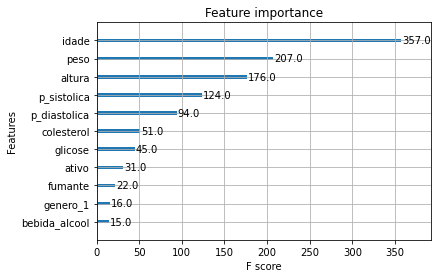

In [101]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_importance(xgb, ax=ax)

In [102]:
X = df[['idade','peso','altura','p_sistolica','p_diastolica','colesterol']]
y = df['cardio']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 7) 

In [106]:
xgb = xgb.XGBClassifier(random_state=7) 

In [107]:
xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.62452
[1]	validation_0-logloss:0.58862
[2]	validation_0-logloss:0.56903
[3]	validation_0-logloss:0.55800
[4]	validation_0-logloss:0.55203
[5]	validation_0-logloss:0.54838
[6]	validation_0-logloss:0.54651
[7]	validation_0-logloss:0.54541
[8]	validation_0-logloss:0.54473
[9]	validation_0-logloss:0.54452
[10]	validation_0-logloss:0.54447
[11]	validation_0-logloss:0.54467
[12]	validation_0-logloss:0.54465
[13]	validation_0-logloss:0.54478
[14]	validation_0-logloss:0.54472
[15]	validation_0-logloss:0.54484
[16]	validation_0-logloss:0.54502
[17]	validation_0-logloss:0.54505
[18]	validation_0-logloss:0.54513
[19]	validation_0-logloss:0.54517
[20]	validation_0-logloss:0.54543


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, ...)

In [108]:
xgb.score(X_test, y_test) 
#Obs: Testei com os dados normalizados, mas não houve melhora

0.7377174172027638

In [119]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
#scaler = MinMaxScaler()
scaller = StandardScaler()
# fit and transform the data
# Se eu não colocar o columns=X.columns eu não vou conseguir selecionar as melhores features
data_normalizado = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(data_normalizado ,y, test_size=0.3, random_state = 7) 

In [121]:
X_train

,idade,peso,altura,p_sistolica,p_diastolica,colesterol
14995,0.857530,0.352632,0.523077,0.007429,0.007182,0.0
26692,0.515834,0.315789,0.594872,0.006180,0.007182,0.0
30431,0.689818,0.289474,0.610256,0.007429,0.007182,0.0
34426,0.296942,0.273684,0.538462,0.006180,0.005364,0.0
51229,0.737979,0.226316,0.620513,0.006804,0.007182,0.0
...,...,...,...,...,...,...
53459,0.735501,0.478947,0.482051,0.009301,0.009001,1.0
10742,0.862176,0.315789,0.610256,0.005556,0.005364,0.0
49689,0.746806,0.278947,0.543590,0.008677,0.007182,0.0
58564,0.741463,0.363158,0.605128,0.009301,0.009001,1.0


In [124]:
xgb = xgb.XGBClassifier() 

In [125]:
xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.62452
[1]	validation_0-logloss:0.58862
[2]	validation_0-logloss:0.56903
[3]	validation_0-logloss:0.55800
[4]	validation_0-logloss:0.55203
[5]	validation_0-logloss:0.54838
[6]	validation_0-logloss:0.54651
[7]	validation_0-logloss:0.54541
[8]	validation_0-logloss:0.54473
[9]	validation_0-logloss:0.54452
[10]	validation_0-logloss:0.54447
[11]	validation_0-logloss:0.54467
[12]	validation_0-logloss:0.54465
[13]	validation_0-logloss:0.54478
[14]	validation_0-logloss:0.54472
[15]	validation_0-logloss:0.54484
[16]	validation_0-logloss:0.54502
[17]	validation_0-logloss:0.54505
[18]	validation_0-logloss:0.54513
[19]	validation_0-logloss:0.54518
[20]	validation_0-logloss:0.54543


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [126]:
xgb.score(X_test, y_test) 
#Obs: Testei com os dados normalizados, mas não houve melhora

0.7377174172027638

### Randomized Search

In [127]:
from sklearn.model_selection import RandomizedSearchCV

In [128]:
parameters = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [100, 500, 1000, 2000]
}

In [129]:
# Criando o objeto RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, parameters, n_iter=10, scoring='accuracy', cv=5, 
                                   random_state=7)

In [130]:
#Separando a variáveis preditores do alvo
X = df.drop(['cardio'], axis=1)
y = df['cardio']

In [131]:
X

,idade,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,genero_1,genero_2
0,18393,168,62.0,110,80,1,1,0,0,1,0,1
1,20228,156,85.0,140,90,3,1,0,0,1,1,0
2,18857,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,169,82.0,150,100,1,1,0,0,1,0,1
4,17474,156,56.0,100,60,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69971,19240,168,76.0,120,80,1,1,1,0,1,0,1
69972,22601,158,126.0,140,90,2,2,0,0,1,1,0
69973,19066,183,105.0,180,90,3,1,0,1,0,0,1
69974,22431,163,72.0,135,80,1,2,0,0,0,1,0


In [132]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 7) 

In [133]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (48962, 12)
Shape dos dados de teste é (20985, 12)


In [134]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 
#minmax = MinMaxScaler()
#X_train = minmax.fit_transform(X_train)
#X_test = minmax.transform(X_test) 


print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[ 0.97762207 -0.89248602  0.19295337 -0.05900139 -0.08727556 -0.53940075
  -0.39561472 -0.31016944 -0.23743761  0.4957072   0.73275552 -0.73275552]
 [-0.81039992  0.81252701 -0.29171117 -0.1949935  -0.08727556 -0.53940075
  -0.39561472 -0.31016944 -0.23743761  0.4957072   0.73275552 -0.73275552]
 [ 0.10002052  1.17788694 -0.63790012 -0.05900139 -0.08727556 -0.53940075
  -0.39561472 -0.31016944 -0.23743761  0.4957072   0.73275552 -0.73275552]
 [-1.95581986 -0.52712609 -0.84561349 -0.1949935  -0.18656758 -0.53940075
  -0.39561472 -0.31016944 -0.23743761  0.4957072   0.73275552 -0.73275552]
 [ 0.35203721  1.42146023 -1.46875362 -0.12699745 -0.08727556 -0.53940075
  -0.39561472 -0.31016944 -0.23743761  0.4957072   0.73275552 -0.73275552]]
-------------------------

X_test :
 [[-2.06035412 -1.74499254 -0.63790012 -0.05900139 -0.18656758 -0.53940075
  -0.39561472 -0.31016944 -0.23

In [135]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           max_delta_step=0, max_depth=6,
                                           max_leaves=0, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 500, 1000, 2000]},
                   random_state=7, scoring='accuracy')

In [136]:
# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(random_search.best_params_)

Melhores hiperparâmetros encontrados:
{'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01}


In [137]:
rand_xgb_best  = random_search.best_estimator_

In [138]:
y_pred = rand_xgb_best.predict(X_test)

### Matriz de Confusão

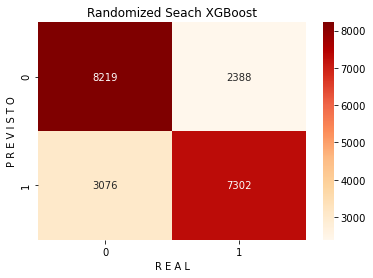

In [139]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Randomized Seach XGBoost')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [142]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
rs_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rs_curva_roc,2)}')

Acurácia:0.74
Precisão:0.75
Recall ou Sensibilidade:0.7
F1-Score:0.73
Kappa:0.48
Curva ROC:0.74


In [148]:
print(classification_report(y_test, rand_xgb_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75     10607
           1       0.75      0.70      0.73     10378

    accuracy                           0.74     20985
   macro avg       0.74      0.74      0.74     20985
weighted avg       0.74      0.74      0.74     20985



### Voting Regressor

In [131]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

In [132]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 7) 

In [133]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 


#minmax = MinMaxScaler()
#X_train = minmax.fit_transform(X_train)
#X_test = minmax.transform(X_test) 


print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[-1.00989532  0.07491286  0.05472226  0.00444292 -0.09203072 -0.53844045
  -0.39578738  3.20631866 -0.23829359 -2.01912339 -1.36253167  1.36253167]
 [-2.00878078  0.07491286  1.7895688  -0.05228562 -0.03388674 -0.53844045
  -0.39578738 -0.31188416 -0.23829359  0.49526443  0.73392789 -0.73392789]
 [-0.89202197  0.07491286  1.37320563  0.17462853  0.01897142 -0.53844045
  -0.39578738 -0.31188416 -0.23829359  0.49526443  0.73392789 -0.73392789]
 [-2.02457824  0.93172926 -0.77800408 -0.05228562 -0.0867449   0.93248137
   1.35166069 -0.31188416 -0.23829359  0.49526443 -1.36253167  1.36253167]
 [ 1.57238157  0.93172926  1.51199335  0.06117146 -0.03388674 -0.53844045
   3.09910876 -0.31188416 -0.23829359  0.49526443 -1.36253167  1.36253167]]
-------------------------

X_test :
 [[ 0.40985064 -0.65950121 -0.98618566 -0.10901415 -0.13960306 -0.53844045
  -0.39578738 -0.31188416 -0.23

In [134]:
r1 = LogisticRegression()
r2 = RandomForestClassifier()
r3 = KNeighborsClassifier()
r4 = DecisionTreeClassifier()
r5 = SVC()
r6 = GradientBoostingClassifier()
r7 = xgb.XGBClassifier()  
er1 = VotingClassifier([('r1', r1), ('r2', r2), ('r3', r3),('r4', r4),('r5', r5),('r6', r6),('r7', r7)])
er1.fit(X_train, y_train)

VotingClassifier(estimators=[('r1', LogisticRegression()),
                             ('r2', RandomForestClassifier()),
                             ('r3', KNeighborsClassifier()),
                             ('r4', DecisionTreeClassifier()), ('r5', SVC()),
                             ('r6', GradientBoostingClassifier()),
                             ('r7',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_roun...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...))])

In [139]:
y_pred = er1.predict(X_test)

### Matriz de Confusão

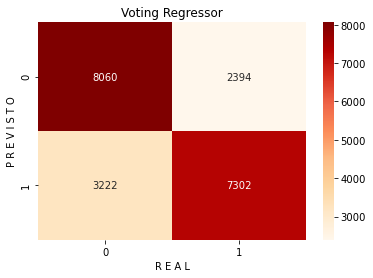

In [140]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Voting Regressor')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [143]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
votting_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(votting_curva_roc,2)}')

Acurácia:0.73
Precisão:0.75
Recall ou Sensibilidade:0.69
F1-Score:0.72
Kappa:0.46
Curva ROC:0.73


In [ ]:
print(classification_report(y_test, er1.predict(X_test)))

### Voting Regressor + Melhores Parâmetros Grid Search

In [144]:
r1 = LogisticRegression(C= 7, penalty= 'l2')
r2 = RandomForestClassifier(n_estimators=100, random_state=7,max_depth=6)
r3 = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 7, weights = 'uniform')
r4 = DecisionTreeClassifier(random_state=7,max_depth=6)
r5 = SVC(C = 10, kernel = 'rbf')
r6 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
r7 = xgb.XGBClassifier(n_estimators = 100, max_depth = 5, learning_rate = 0.1)  
er2 = VotingClassifier([('r1', r1), ('r2', r2), ('r3', r3),('r4', r4),('r5', r5),('r6', r6),('r7', r7)])
er2.fit(X_train, y_train)

VotingClassifier(estimators=[('r1', LogisticRegression(C=7)),
                             ('r2',
                              RandomForestClassifier(max_depth=6,
                                                     random_state=7)),
                             ('r3',
                              KNeighborsClassifier(algorithm='brute',
                                                   n_neighbors=7)),
                             ('r4',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=7)),
                             ('r5', SVC(C=10)),
                             ('r6', GradientBoostingClassifier()),
                             ('r7',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=N...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...))])

In [145]:
y_pred = er2.predict(X_test)

In [146]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
votting_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(votting_curva_roc,2)}')

Acurácia:0.73
Precisão:0.76
Recall ou Sensibilidade:0.68
F1-Score:0.72
Kappa:0.47
Curva ROC:0.73


In [174]:
print(classification_report(y_test, er2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75     10607
           1       0.75      0.70      0.73     10378

    accuracy                           0.74     20985
   macro avg       0.74      0.74      0.74     20985
weighted avg       0.74      0.74      0.74     20985



### Segundo o Pycaret o melhor é o lightgbm

In [1]:
!pip install lightgbm

In [3]:
from lightgbm import LGBMClassifier

In [75]:
lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [76]:
# Treinar o modelo
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=5, random_state=7)

In [77]:
y_pred = lgbm.predict(X_test)

In [78]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
lgbm_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(lgbm_curva_roc,2)}')

Acurácia:0.74
Precisão:0.77
Recall ou Sensibilidade:0.68
F1-Score:0.72
Kappa:0.47
Curva ROC:0.74


## Referências

* Grid Search with Logistic Regression. Disponível em: https://www.kaggle.com/code/enespolat/grid-search-with-logistic-regression. Acesso em 30/05/2023.
* sklearn.model_selection.GridSearchCV. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. Acesso em 30/05/2023.